# Sheet 5
## Author
Maximilian Stablum 

Note: I created the following Sheet together with Tamino Gaub (tamino.gaub@student.uibk.ac.at). The Sheet looks in the most parts identical to him.

## Excersise 1a

In [1]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

In [2]:
# read csv into dataframe
df = pd.read_csv('./data/primarySources_MLOps.csv', delimiter=';')
df.sample(5)

,APA,Name,Year,Title,Authors,Proceeding,Abstract,Link,Google Scholar Reference
862,"Hao, T., Huang, Y., Wen, X., Gao, W., Zhang, F...",7_edge_computing_deep_learning,2019,Edge AIBench: towards comprehensive end-to-end...,"Tianshu Hao, Yunyou Huang, Xu Wen, Wanling Gao...","Benchmarking, Measuring, and Optimizing: First...","In edge computing scenarios, the distribution ...",https://link.springer.com/chapter/10.1007/978-...,zwCQGP9KOJ4J
744,"Guo, Q., Xie, X., Ma, L., Hu, Q., Feng, R., Li...",4_dl_testing_deep_network,2018,An orchestrated empirical study on deep learni...,"Qianyu Guo, Xiaofei Xie, Lei Ma, Qiang Hu, Rui...","arXiv preprint arXiv:1811.05187, 2018",Deep learning (DL) has recently achieved treme...,https://arxiv.org/abs/1811.05187,mFmAOK2-KAAJ
57,"Spell, D. C., Zeng, X. H. T., Chung, J. Y., No...",1_ml_machine_data_learning,2017,"Flux: Groupon's automated, scalable, extensibl...","Derrick C Spell, Xiao-Han T Zeng, Jae Young Ch...",2017 IEEE International Conference on Big Data...,As machine learning becomes the driving force ...,https://ieeexplore.ieee.org/abstract/document/...,D85ab02PgmgJ
1009,"McGraw, G., Bonett, R., Figueroa, H., & Shepar...",5_adversarial_attack_example_model,2019,Security engineering for machine learning,"Gary McGraw, Richie Bonett, Harold Figueroa, V...","Computer 52 (8), 54-57, 2019",Artificial intelligence is in the midst of a p...,https://ieeexplore.ieee.org/abstract/document/...,eNHslhIoYHMJ
240,"Renggli, C., Rimanic, L., Gürel, N. M., Karlaš...",1_ml_machine_data_learning,2021,A data quality-driven view of mlops,"Cedric Renggli, Luka Rimanic, Nezihe Merve Gür...","arXiv preprint arXiv:2102.07750, 2021",Developing machine learning models can be seen...,https://arxiv.org/abs/2102.07750,Kps7-A7vtGUJ


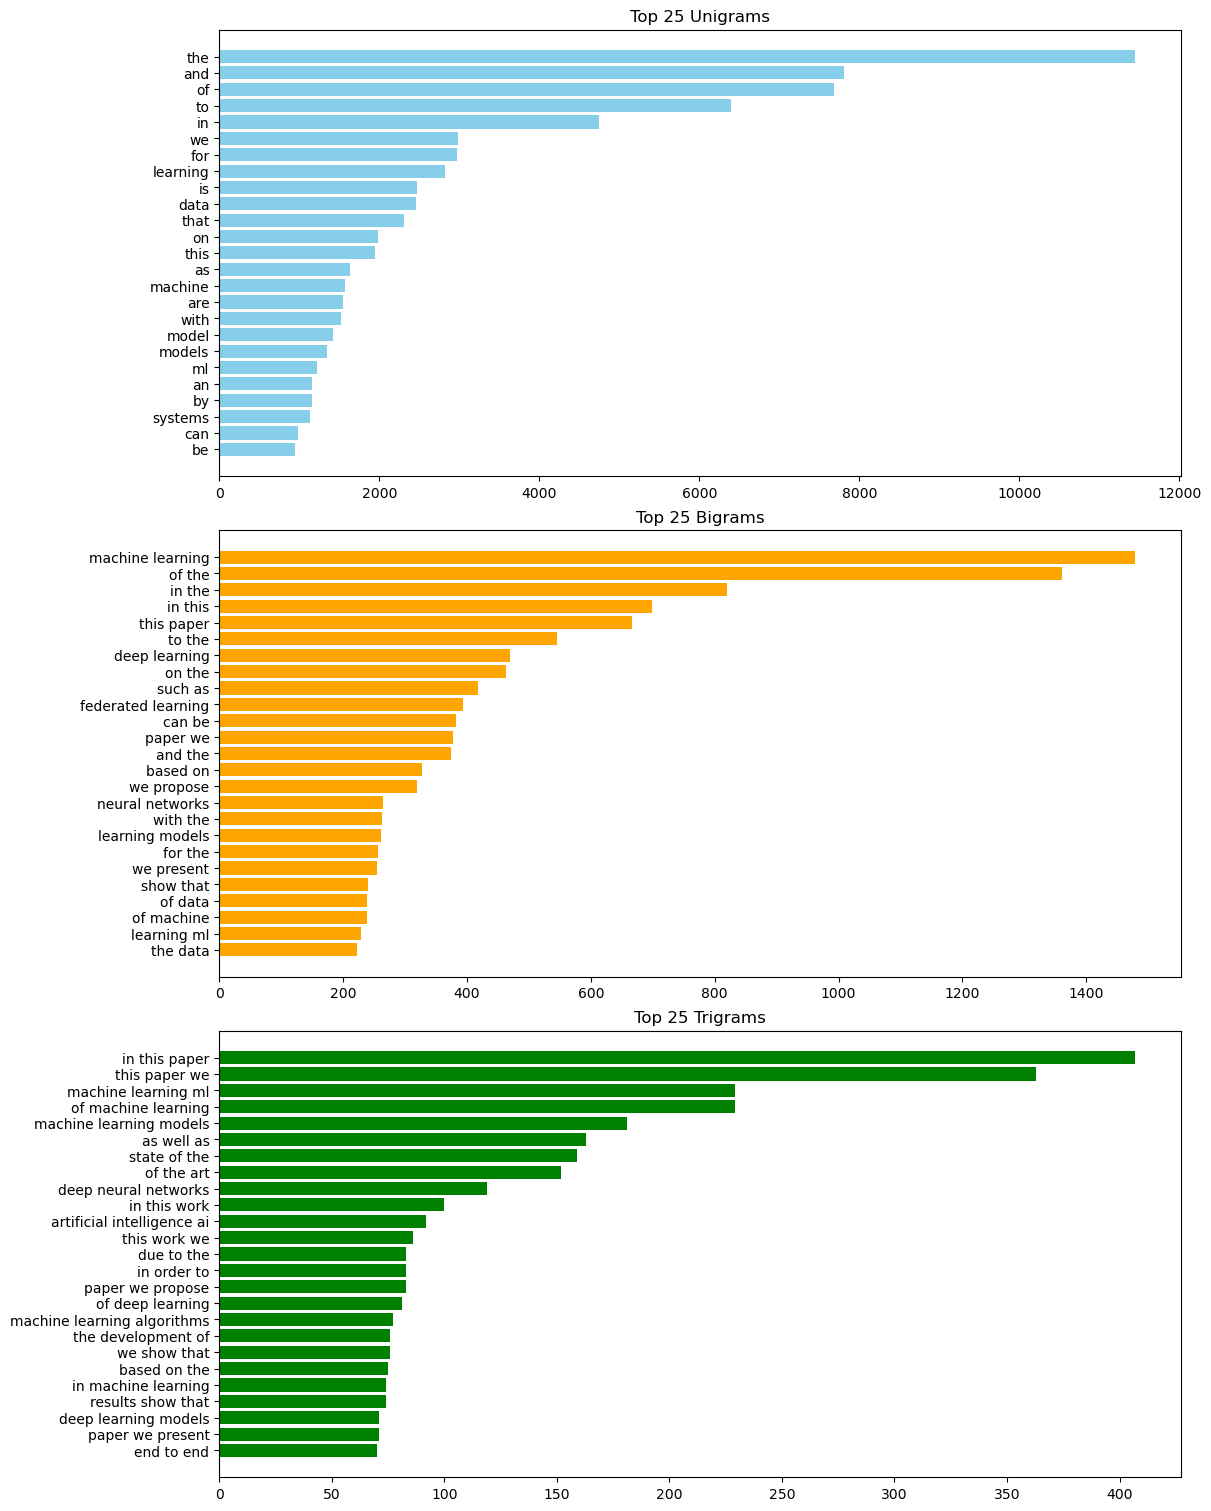

In [3]:
# Function to remove stopwords
def get_top_ngrams(corpus, ngram_range, top_n=25):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    freq = Counter(dict(zip(feature_names, counts)))
    return freq.most_common(top_n)

# Extract top 25 unigrams, bigrams and trigrams
top_1grams = get_top_ngrams(df['Abstract'], ngram_range=(1, 1), top_n=25)
top_2grams = get_top_ngrams(df['Abstract'], ngram_range=(2, 2), top_n=25)
top_3grams = get_top_ngrams(df['Abstract'], ngram_range=(3, 3), top_n=25)

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)

# 1-Gramme
axes[0].barh(
    [item[0] for item in top_1grams],
    [item[1] for item in top_1grams],
    color='skyblue'
)
axes[0].set_title("Top 25 Unigrams")
axes[0].invert_yaxis()

# 2-Gramme
axes[1].barh(
    [item[0] for item in top_2grams],
    [item[1] for item in top_2grams],
    color='orange'
)
axes[1].set_title("Top 25 Bigrams")
axes[1].invert_yaxis()

# 3-Gramme
axes[2].barh(
    [item[0] for item in top_3grams],
    [item[1] for item in top_3grams],
    color='green'
)
axes[2].set_title("Top 25 Trigrams")
axes[2].invert_yaxis()

plt.show()

Please explain what n-grams are, and how your extracted n-gram vectors look like.

- n-grams are transforming words into tokens
- There are three different n-grams dimensions
    - Unigramme (n = 1): Every Word is one token
    - Bigramme: (n = 2): Two words are building one token and each single word is then part of 2 tokens
    - Trigramme: (n = 3): Three words are building one token and each single word in then part of 3 tokens
- Extraction of features: Each and every token is analyzed, how often it occurs and this is expressed in a vector

Extracting N-gram Vectors:The extracted n-gram vectors are stored in a 'numpy.ndarray'

### Finally, make the same visualization per year. Can you spot any differences between years?

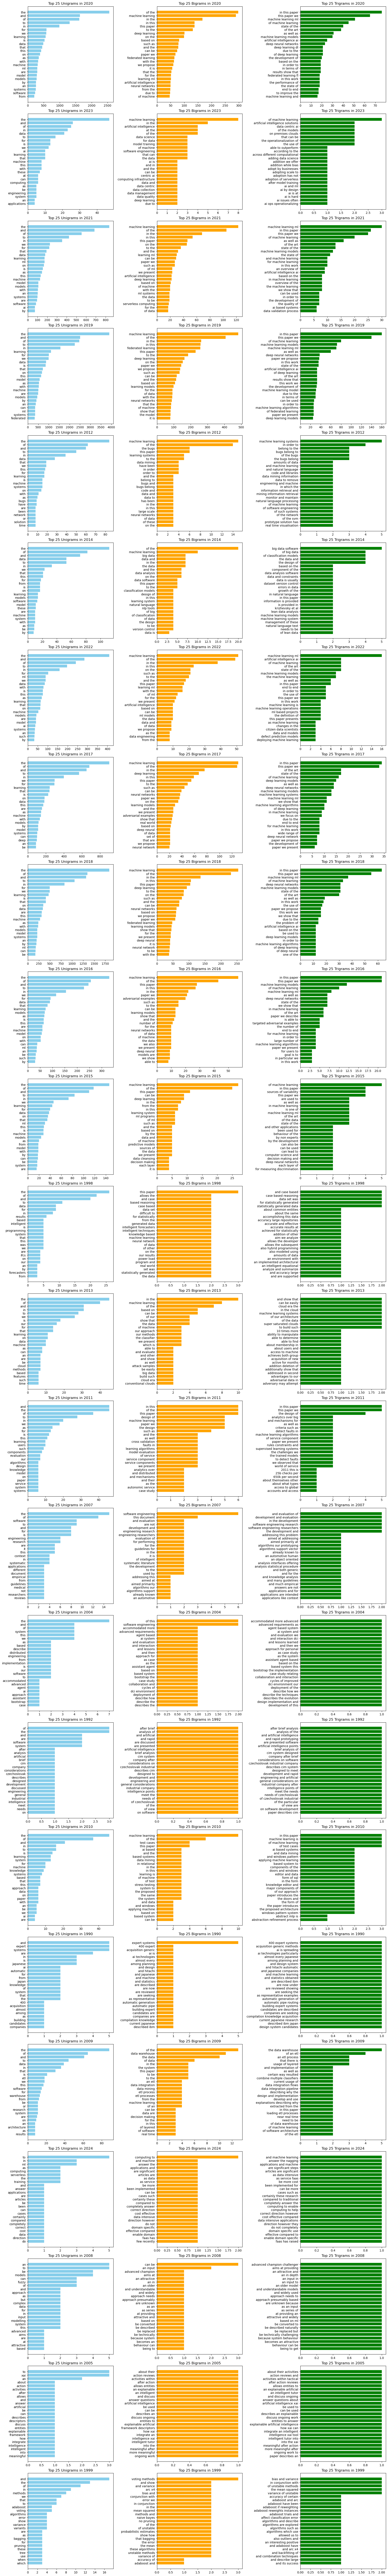

In [4]:
# Group by year
years = df['Year'].unique()

# Visualization by year
fig, axes = plt.subplots(len(years), 3, figsize=(18, 5 * len(years)), constrained_layout=True)

for i, year in enumerate(years):
    df_year = df[df['Year'] == year]
    corpus = df_year['Abstract']
    
    # Top 25 N-Gramme per year for = 1, 2, 3
    top_1grams = get_top_ngrams(corpus, ngram_range=(1, 1), top_n=25)
    top_2grams = get_top_ngrams(corpus, ngram_range=(2, 2), top_n=25)
    top_3grams = get_top_ngrams(corpus, ngram_range=(3, 3), top_n=25)
    
    # Subplots for every Year
    axes[i, 0].barh([item[0] for item in top_1grams], [item[1] for item in top_1grams], color='skyblue')
    axes[i, 0].set_title(f"Top 25 Unigrams in {year}")
    axes[i, 0].invert_yaxis()
    
    axes[i, 1].barh([item[0] for item in top_2grams], [item[1] for item in top_2grams], color='orange')
    axes[i, 1].set_title(f"Top 25 Bigrams in {year}")
    axes[i, 1].invert_yaxis()
    
    axes[i, 2].barh([item[0] for item in top_3grams], [item[1] for item in top_3grams], color='green')
    axes[i, 2].set_title(f"Top 25 Trigrams in {year}")
    axes[i, 2].invert_yaxis()

plt.show()

Difference between the years:
- For the Unigrams, still most of the highly common tokens are stopwords
- For Bigrams, the tokens for computing and machine learning got more and more important over the years
- For Trigrams, the tokens regarding the machine learning topic also got more important and in some cases the most common words from the Bigram are also listed in the Trigram just with one additional Stopword

## Excersise 1b
Here, at least remove stopwords and perform either lemmatization or stemming, but feel free to do further preprocessing and cleaning steps.

In [5]:
# identify the most common unigrams
for unigram, count in top_1grams:
    print(f"{unigram}: {count}")

and: 17
the: 13
of: 11
in: 9
methods: 8
we: 7
that: 6
to: 6
adaboost: 5
voting: 5
algorithms: 4
error: 4
show: 4
variance: 4
variants: 4
are: 3
as: 3
bagging: 3
for: 3
pruning: 3
these: 3
tree: 3
use: 3
when: 3
which: 3


In [6]:
# function to remove stopwords
def remove_stopwords(text):
    # split text into words and remove stopwords
    return " ".join([word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS])

# apply the function to the Abstract column
df['Cleaned_Abstract'] = df['Abstract'].apply(remove_stopwords)

# Output the Abstract and Cleaned_Abstract columns
print(df[['Abstract', 'Cleaned_Abstract']])

                                               Abstract  \
0     Autonomous Real-time Testing requires test aut...   
1     The development and deployment of machine lear...   
2     When developing software systems that contain ...   
3     With the explosive growth of AI and ML-driven ...   
4     In recent years we have witnessed a boom in In...   
...                                                 ...   
1342  Neural networks are increasingly deployed in r...   
1343  Health informatics is a field in which the dis...   
1344  With this paper, we present our reflections on...   
1345  Probabilistic programming systems (PP systems)...   
1346  Deep neural network-based classifiers are know...   

                                       Cleaned_Abstract  
0     autonomous real-time testing requires test aut...  
1     development deployment machine learning (ml) a...  
2     developing software systems contain machine le...  
3     explosive growth ai ml-driven processes, compa...  
4

### Stemming
Here, at least remove stopwords and perform either lemmatization or stemming

In [7]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to Stem the text
def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# Apply the function to the Cleaned_Abstract column
df['Stemmed_Abstract'] = df['Cleaned_Abstract'].apply(stem_text)

# Output the Abstract, Cleaned_Abstract and Stemmed_Abstract columns
print(df[['Abstract', 'Cleaned_Abstract', 'Stemmed_Abstract']])

                                               Abstract  \
0     Autonomous Real-time Testing requires test aut...   
1     The development and deployment of machine lear...   
2     When developing software systems that contain ...   
3     With the explosive growth of AI and ML-driven ...   
4     In recent years we have witnessed a boom in In...   
...                                                 ...   
1342  Neural networks are increasingly deployed in r...   
1343  Health informatics is a field in which the dis...   
1344  With this paper, we present our reflections on...   
1345  Probabilistic programming systems (PP systems)...   
1346  Deep neural network-based classifiers are know...   

                                       Cleaned_Abstract  \
0     autonomous real-time testing requires test aut...   
1     development deployment machine learning (ml) a...   
2     developing software systems contain machine le...   
3     explosive growth ai ml-driven processes, compa...

### What are stopwords and why do we remove them?
Stopwords are filling words in the english language, which are not relevatn for the context like "and", "or", "the" etc.

### What is the difference between stemming and lemmatization, and when would you use which?
- Stemming cuts words to their base or root form, often resulting in non-words ("running" becomes "run" and "better" becomes "bet"). 
- Lemmatization reduces words to their dictionary form, ensuring they remain valid words ("better" becomes "good"). 
- Stemming is used for speed and simplicity, and lemmatization for accuracy and context.

## Excersise 1c
Repeat the feature extraction and visualizations from before (exercise 1a), but this time on your preprocessed dataset. How do the top features on the preprocessed dataset differ from the ones on the raw dataset?

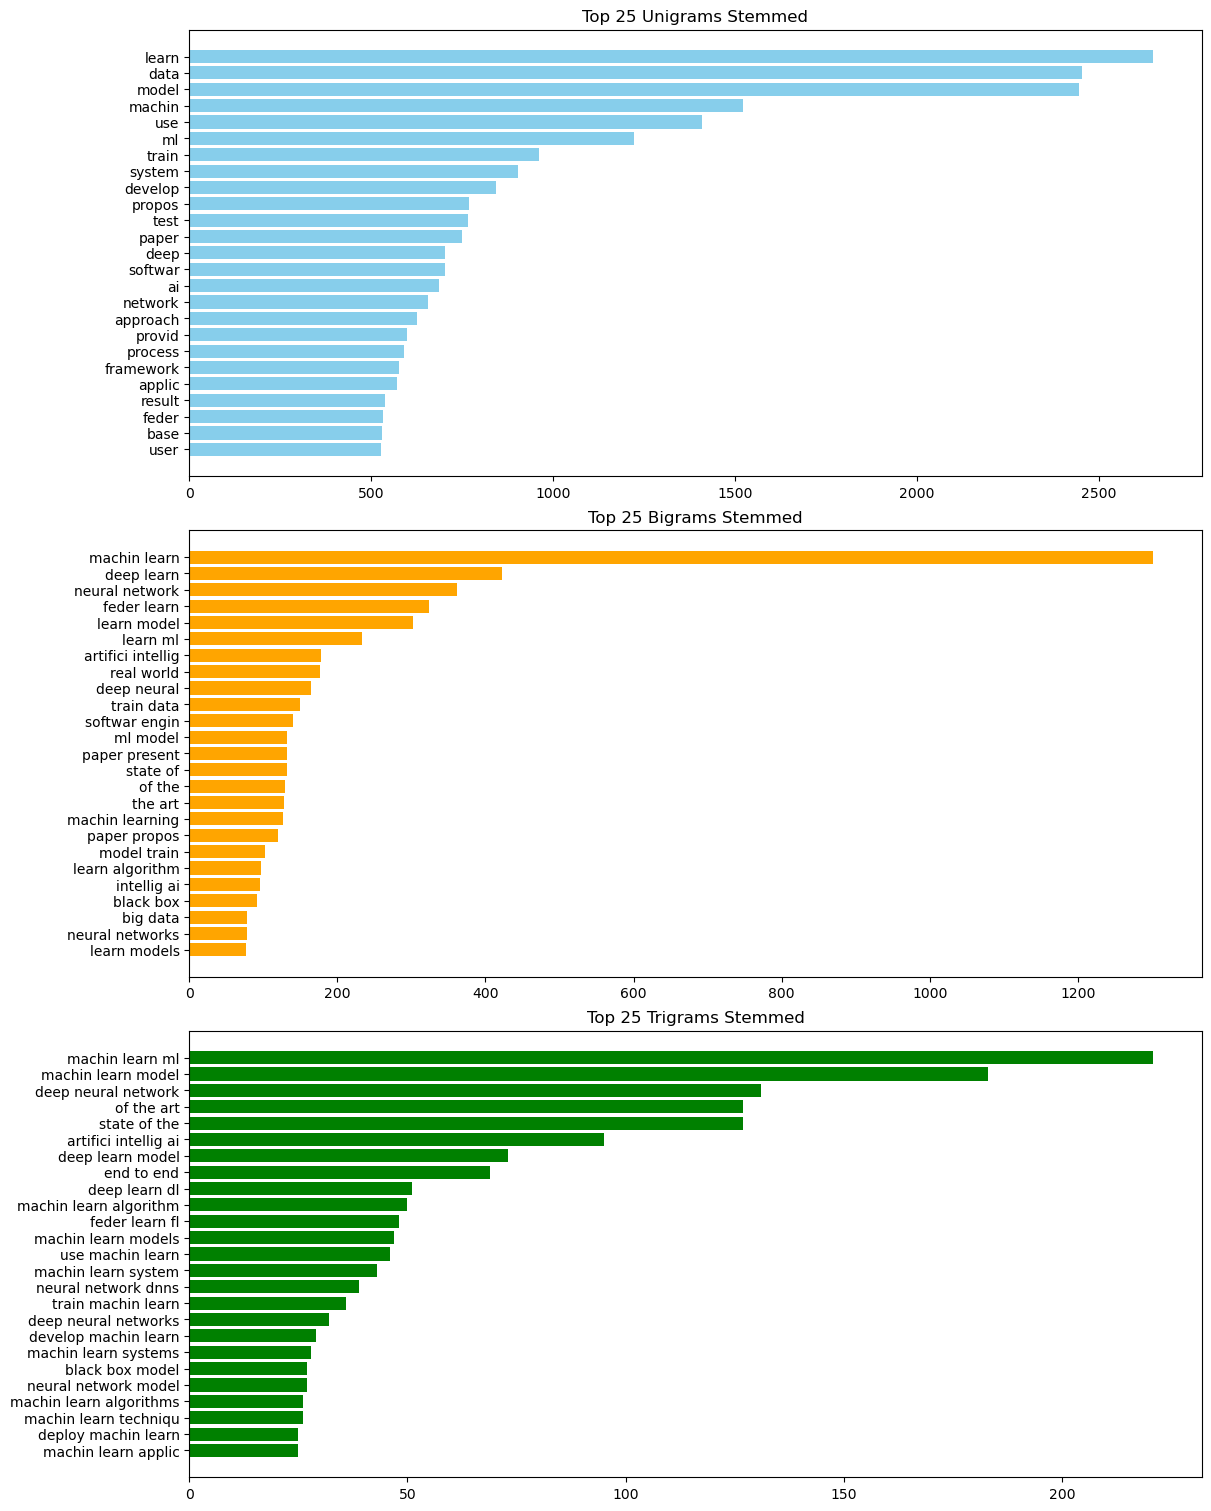

In [8]:
# Extract n-grams for n = 1, 2, 3
top_1grams_stemmed = get_top_ngrams(df['Stemmed_Abstract'], ngram_range=(1, 1), top_n=25)
top_2grams_stemmed = get_top_ngrams(df['Stemmed_Abstract'], ngram_range=(2, 2), top_n=25)
top_3grams_stemmed = get_top_ngrams(df['Stemmed_Abstract'], ngram_range=(3, 3), top_n=25)

# Vizualization
fig, axes = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)

# 1-Gramme
axes[0].barh(
    [item[0] for item in top_1grams_stemmed],
    [item[1] for item in top_1grams_stemmed],
    color='skyblue'
)
axes[0].set_title("Top 25 Unigrams Stemmed")
axes[0].invert_yaxis()

# 2-Gramme
axes[1].barh(
    [item[0] for item in top_2grams_stemmed],
    [item[1] for item in top_2grams_stemmed],
    color='orange'
)
axes[1].set_title("Top 25 Bigrams Stemmed")
axes[1].invert_yaxis()

# 3-Gramme
axes[2].barh(
    [item[0] for item in top_3grams_stemmed],
    [item[1] for item in top_3grams_stemmed],
    color='green'
)
axes[2].set_title("Top 25 Trigrams Stemmed")
axes[2].invert_yaxis()

plt.show()